In [278]:
from io import BytesIO
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook
sns.set(style="whitegrid")

In [333]:
# load date
gdoc_url = 'https://docs.google.com/spreadsheets/d/1X1HTxkI6SqsdpNSkSSivMzpxNT-oeTbjFFDdEkXD30o/export?format=csv&id=1X1HTxkI6SqsdpNSkSSivMzpxNT-oeTbjFFDdEkXD30o&gid=695409533'
r = requests.get(gdoc_url)
data = r.content
df = pd.read_csv(BytesIO(data), index_col=None, header=0)

In [334]:
#preprocess data
df['Reviewer Rating'] = pd.to_numeric(df['Reviewer Rating'], errors='coerce')
df = df[['Whisky Name','Reviewer Rating', 'Whisky Region or Style']]
# df = df.dropna()
df['Whisky Region or Style'] = df['Whisky Region or Style'].str.lower()
df['Whisky Region or Style'] = df['Whisky Region or Style'].str.rstrip('s')
df = df[df['Reviewer Rating'] > 40]

In [335]:
df_region = df.groupby('Whisky Region or Style').filter(lambda x: len(x) > 50)
df_region.reset_index().drop('index',axis=1)

,Whisky Name,Reviewer Rating,Whisky Region or Style
0,100 Pipers,68.0,blend
1,1792 225th Anniversary,80.0,bourbon
2,1792 Bottled In Bond,80.0,bourbon
3,1792 Bottled In Bond Oak Liquor Cabinet Pick,90.0,bourbon
4,1792 Full Proof,85.0,bourbon
...,...,...,...
31920,Ardbeg Lord of the Isles,91.0,islay
31921,Glendronach 18 Tawny Port,70.0,speyside
31922,Mortlach 22 Marriage of Casks,90.0,speyside
31923,Barrell Bourbon New Year 2017,84.0,bourbon


In [336]:
sort = df_region.groupby('Whisky Region or Style').aggregate([np.count_nonzero,np.median]).sort_values(by=('Reviewer Rating','median'))
order = sort.index[::-1]
count = sort[('Reviewer Rating','count_nonzero')].values[::-1]

<IPython.core.display.Javascript object>


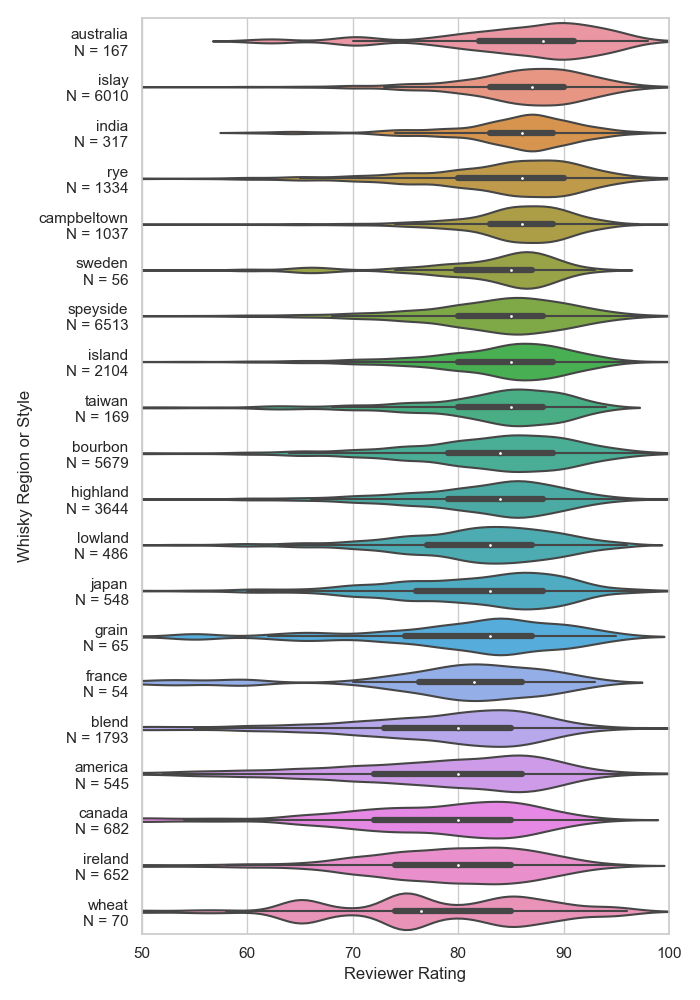

[Text(0, 0, 'australia\nN = 167'),
 Text(0, 1, 'islay\nN = 6010'),
 Text(0, 2, 'india\nN = 317'),
 Text(0, 3, 'rye\nN = 1334'),
 Text(0, 4, 'campbeltown\nN = 1037'),
 Text(0, 5, 'sweden\nN = 56'),
 Text(0, 6, 'speyside\nN = 6513'),
 Text(0, 7, 'island\nN = 2104'),
 Text(0, 8, 'taiwan\nN = 169'),
 Text(0, 9, 'bourbon\nN = 5679'),
 Text(0, 10, 'highland\nN = 3644'),
 Text(0, 11, 'lowland\nN = 486'),
 Text(0, 12, 'japan\nN = 548'),
 Text(0, 13, 'grain\nN = 65'),
 Text(0, 14, 'france\nN = 54'),
 Text(0, 15, 'blend\nN = 1793'),
 Text(0, 16, 'america\nN = 545'),
 Text(0, 17, 'canada\nN = 682'),
 Text(0, 18, 'ireland\nN = 652'),
 Text(0, 19, 'wheat\nN = 70')]

In [348]:
plt.figure(figsize=(7,10))
ax = sns.violinplot(y='Whisky Region or Style', x='Reviewer Rating', data=df_region, order=order, scale='width', bw=0.2)
ax.set_xlim(50,100)
# ax.tick_params(axis='y',labelrotation=45)
plt.tight_layout()

for i, label in enumerate(ax.get_yticklabels()):
    label.set_text(order[i] + '\n' + 'N = ' +  str(int(count[i])))
ax.set_yticklabels(ax.get_yticklabels())